In [1]:
# A1: Functions for various units


def summation_unit(weights, inputs):
    return sum(w * i for w, i in zip(weights, inputs))


def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    import math
    return 1 / (1 + math.exp(-x))

def tanh(x):
    import math
    return math.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# comparator unit for error calculation
def error_calculator(predicted, actual):
    return actual - predicted


   


Final Weights: [-0.10000000000000765, 0.1000000000000001, 0.05000000000000032]
Total Epochs: 130


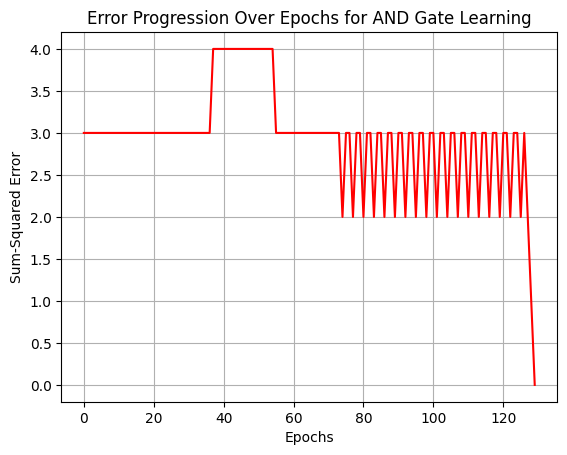

In [2]:
# A2: Perceptron for AND gate using Step Activation Function

import matplotlib.pyplot as plt


def perceptron_and_gate(inputs, initial_weights, learning_rate=0.05, max_epochs=1000, convergence_error=0.002):
    weights = initial_weights[:]
    epoch = 0
    errors_progression = []
    converged = False
    
    while not converged and epoch < max_epochs:
        total_error = 0
        for input_pair, target in inputs:
            # Calculate weighted sum + bias
            summation = summation_unit(weights, [1] + input_pair)  # Adding bias as input 1
            # Apply step activation function
            output = step_function(summation)
            # Calculate error
            error = error_calculator(output, target)
            total_error += error ** 2  # Sum-squared error
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learning_rate * error * ([1] + input_pair)[i]
        
        errors_progression.append(total_error)
        if total_error <= convergence_error:
            converged = True
        epoch += 1
    
    return weights, errors_progression, epoch

# Initial weights and inputs for AND gate
initial_weights = [10, 0.2, -0.75]
and_gate_inputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]

# Train perceptron
final_weights, error_progression, total_epochs = perceptron_and_gate(and_gate_inputs, initial_weights)

print("Final Weights:", final_weights)
print("Total Epochs:", total_epochs)


plt.plot(range(total_epochs), error_progression, linestyle='-', color='r')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for AND Gate Learning')
plt.grid(True)
plt.show()


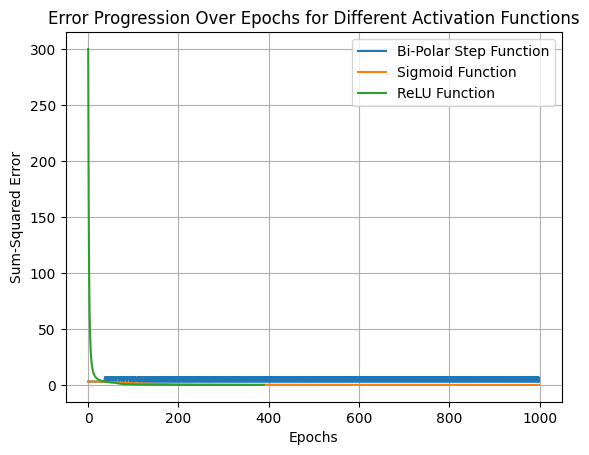

Activation Function: Bi-Polar Step Function
Final Weights: [-0.0999999999999975, 0.09999999999999902, 0.05000000000000643]
Total Epochs: 1000

Activation Function: Sigmoid Function
Final Weights: [-6.1353130787344305, 3.970833206406072, 3.963948347259991]
Total Epochs: 1000

Activation Function: ReLU Function
Final Weights: [-0.9277447198109581, 0.9511600082912268, 0.9498108559260638]
Total Epochs: 390



In [3]:
def perceptron_with_activation(inputs, initial_weights, activation_function, learning_rate=0.05, max_epochs=1000, convergence_error=0.002):
    weights = initial_weights[:] 
    epoch = 0
    errors = []
    converged = False
    
    while not converged and epoch < max_epochs:
        total_error = 0
        for input_pair, target in inputs:
            # Calculate weighted sum + bias
            summation = summation_unit(weights, [1] + input_pair)  # Adding bias as input 1
            # Apply the selected activation function
            output = activation_function(summation)
            # Calculate error
            error = error_calculator(output, target)
            total_error += error ** 2  # Sum-squared error
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learning_rate * error * ([1] + input_pair)[i]
        
        errors.append(total_error)
        if total_error <= convergence_error:
            converged = True
        epoch += 1
    
    return weights, errors, epoch

# Initial weights and inputs for AND gate
initial_weights = [10, 0.2, -0.75]
and_gate_inputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]

# Train perceptron with different activation functions
activation_functions = [bipolar_step_function, sigmoid, relu]
activation_names = ['Bi-Polar Step Function', 'Sigmoid Function', 'ReLU Function']

results = {}

for activation, name in zip(activation_functions, activation_names):
    final_weights, error_progression, total_epochs = perceptron_with_activation(and_gate_inputs, initial_weights, activation)
    results[name] = {'weights': final_weights, 'errors': error_progression, 'epochs': total_epochs}

    # Plotting the error progression
    plt.plot(range(total_epochs), error_progression, linestyle='-', label=name)


plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


for name, result in results.items():
    print(f"Activation Function: {name}")
    print(f"Final Weights: {result['weights']}")
    print(f"Total Epochs: {result['epochs']}\n")

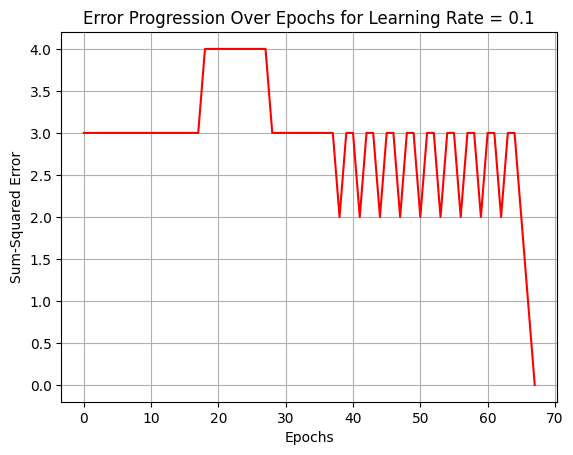

Learning Rate: 0.1
Final Weights: [-0.2999999999999812, 0.19999999999999998, 0.15000000000000005]
Total Epochs: 68


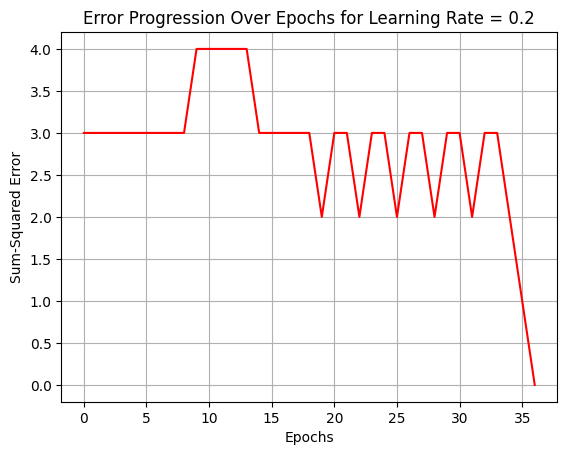

Learning Rate: 0.2
Final Weights: [-0.599999999999998, 0.39999999999999997, 0.24999999999999978]
Total Epochs: 37


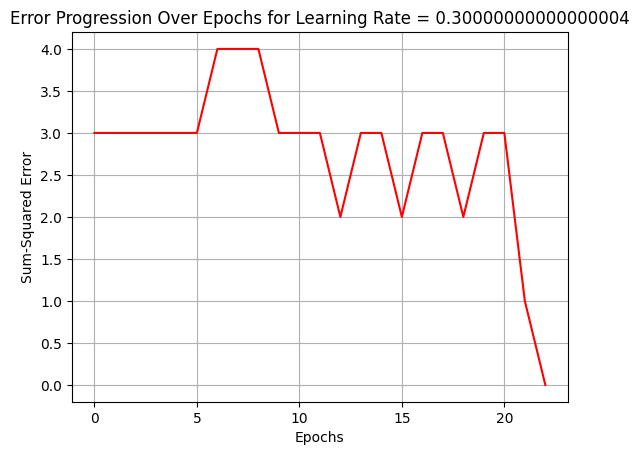

Learning Rate: 0.30000000000000004
Final Weights: [-0.20000000000000107, 0.19999999999999996, 0.15000000000000036]
Total Epochs: 23


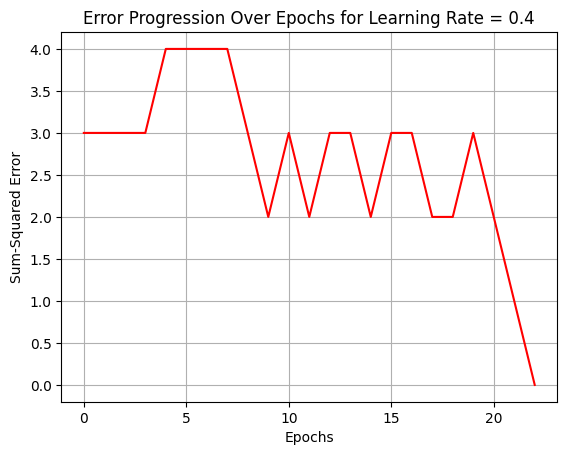

Learning Rate: 0.4
Final Weights: [-1.2000000000000044, 1.0000000000000002, 0.4500000000000002]
Total Epochs: 23


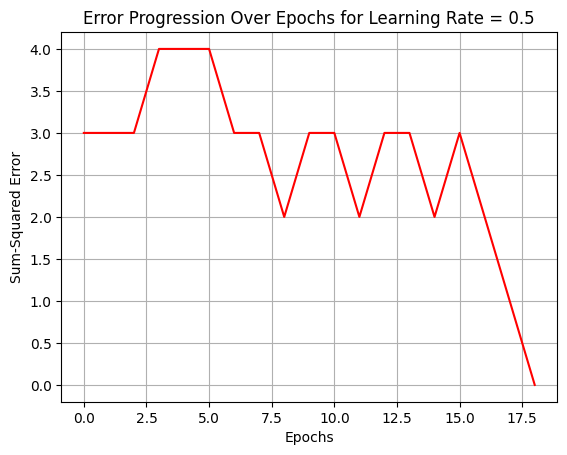

Learning Rate: 0.5
Final Weights: [-1.5, 1.2, 0.75]
Total Epochs: 19


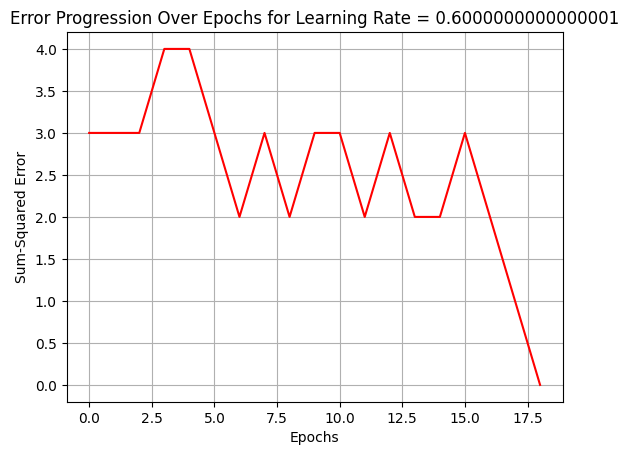

Learning Rate: 0.6000000000000001
Final Weights: [-1.9999999999999973, 1.4000000000000004, 1.0500000000000003]
Total Epochs: 19


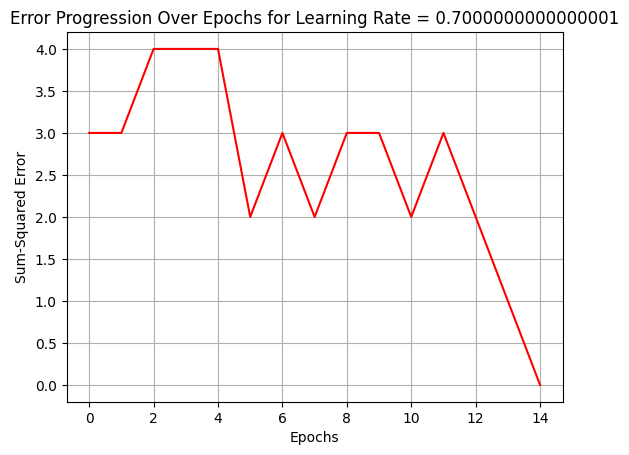

Learning Rate: 0.7000000000000001
Final Weights: [-1.9000000000000008, 1.6, 0.65]
Total Epochs: 15


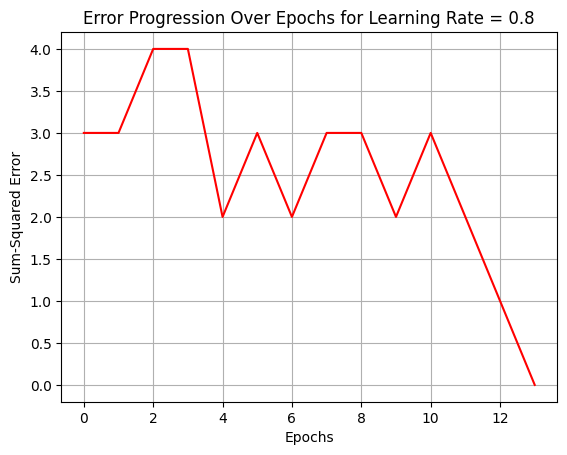

Learning Rate: 0.8
Final Weights: [-2.0000000000000004, 1.8, 0.8499999999999996]
Total Epochs: 14


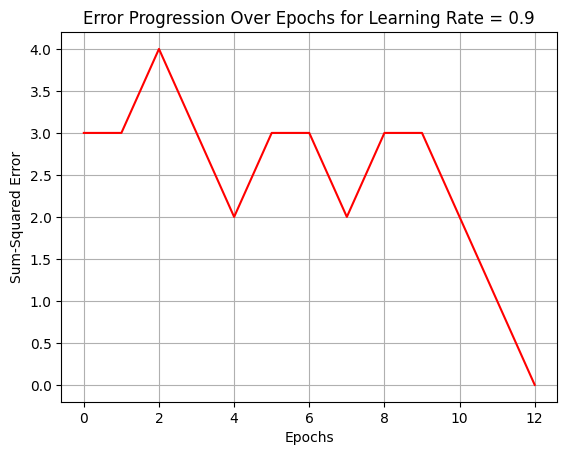

Learning Rate: 0.9
Final Weights: [-2.600000000000002, 2.0, 1.0500000000000003]
Total Epochs: 13


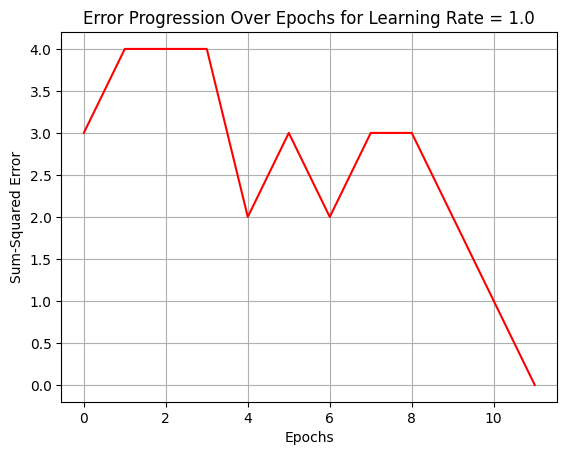

Learning Rate: 1.0
Final Weights: [-3.0, 2.2, 1.25]
Total Epochs: 12


In [4]:
initial_weights = [10, 0.2, -0.75]
and_gate_inputs = [([0, 0], 0), ([0, 1], 0), ([1, 0], 0), ([1, 1], 1)]

# Learning rates to test
learning_rates = [0.1 * i for i in range(1, 11)]

# Store the results for each learning rate
results = {}

for lr in learning_rates:
    final_weights, error_progression, total_epochs = perceptron_and_gate(and_gate_inputs, initial_weights, lr)
    results[lr] = {
        "final_weights": final_weights,
        "error_progression": error_progression,
        "total_epochs": total_epochs
    }

# Plotting the results separately for each learning rate
for lr in learning_rates:
    plt.figure()
    plt.plot(range(results[lr]['total_epochs']), results[lr]['error_progression'], linestyle='-', color='r')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(f'Error Progression Over Epochs for Learning Rate = {lr}')
    plt.grid(True)
    plt.show()

    print(f"Learning Rate: {lr}")
    print("Final Weights:", results[lr]['final_weights'])
    print("Total Epochs:", results[lr]['total_epochs'])


In [5]:
import numpy as np
import matplotlib.pyplot as plt

Final Weights for XOR Gate: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs for XOR Gate: 1000


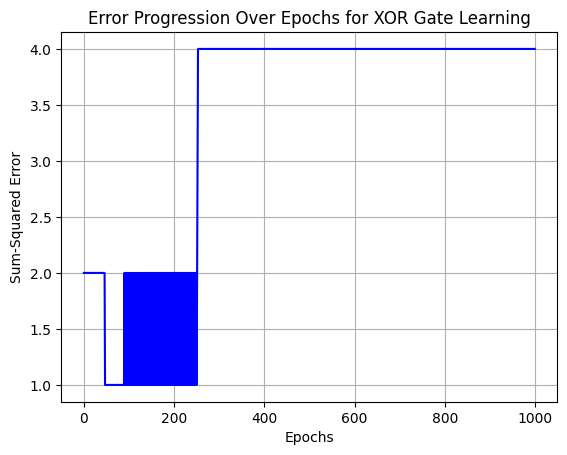

In [6]:
# Perceptron learning function
def perceptron_xor_gate(inputs, initial_weights, learning_rate, max_epochs=1000, convergence_error=0.002):
    weights = initial_weights[:]  # Copy initial weights
    epoch = 0
    converged = False
    error_progression = []
    
    while not converged and epoch < max_epochs:
        total_error = 0
        for input_pair, target in inputs:
            # Calculate weighted sum + bias
            summation = summation_unit(weights, [1] + input_pair)  # Adding bias as input 1
            # Apply step activation function
            output = step_function(summation)
            # Calculate error
            error = error_calculator(output, target)
            total_error += error ** 2  # Sum-squared error
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learning_rate * error * ([1] + input_pair)[i]
        
        error_progression.append(total_error)
        if total_error <= convergence_error:
            converged = True
        epoch += 1
    
    return weights, error_progression, epoch

# Initial weights and inputs for XOR gate
initial_weights = [10, 0.2, -0.75]
xor_gate_inputs = [([0, 0], 0), ([0, 1], 1), ([1, 0], 1), ([1, 1], 0)]

# Learning rate for A1
learning_rate = 0.05

# Train perceptron for XOR gate
final_weights, error_progression, total_epochs = perceptron_xor_gate(xor_gate_inputs, initial_weights, learning_rate)

print("Final Weights for XOR Gate:", final_weights)
print("Total Epochs for XOR Gate:", total_epochs)

plt.plot(range(total_epochs), error_progression, linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for XOR Gate Learning')
plt.grid(True)
plt.show()


Activation Function: Bi-Polar Step
Final Weights: [0.1999999999999919, -0.09999999999999969, -0.15000000000000013]
Total Epochs: 1000


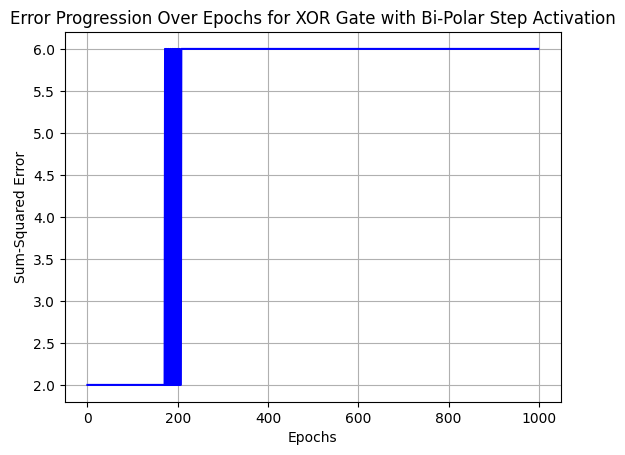

Activation Function: Sigmoid
Final Weights: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs: 1000


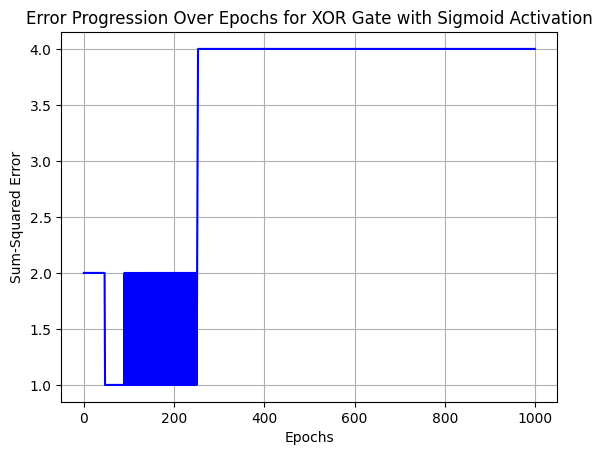

Activation Function: ReLU
Final Weights: [0.09999999999999236, -0.09999999999999969, -0.09999999999999969]
Total Epochs: 1000


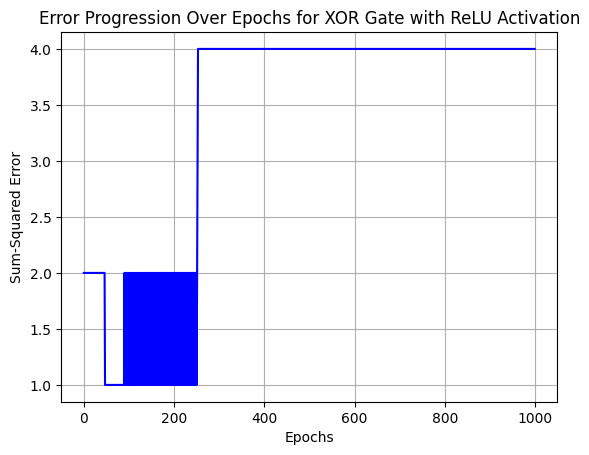

In [7]:
# Modified Perceptron for Different Activation Functions
def perceptron_with_activation(inputs, initial_weights, learning_rate, activation_function, max_epochs=1000, convergence_error=0.002):
    weights = initial_weights[:]
    epoch = 0
    converged = False
    error_progression = []
    
    while not converged and epoch < max_epochs:
        total_error = 0
        for input_pair, target in inputs:
            # Calculate weighted sum + bias
            summation = summation_unit(weights, [1] + input_pair)
            # Apply the specified activation function
            output = activation_function(summation)
            # For non-binary output (like sigmoid), we use thresholding to calculate binary error
            if activation_function == sigmoid:
                output = 1 if output >= 0.5 else 0
            elif activation_function == relu:
                output = 1 if output > 0 else 0
            # Calculate error
            error = error_calculator(output, target)
            total_error += error ** 2
            
            # Update weights
            for i in range(len(weights)):
                weights[i] += learning_rate * error * ([1] + input_pair)[i]
        
        error_progression.append(total_error)
        if total_error <= convergence_error:
            converged = True
        epoch += 1
    
    return weights, error_progression, epoch

# Activation Functions to Test
activation_functions = [bipolar_step_function, sigmoid, relu]
activation_function_names = ["Bi-Polar Step", "Sigmoid", "ReLU"]

# Train perceptron for each activation function
for activation_function, name in zip(activation_functions, activation_function_names):
    final_weights, error_progression, total_epochs = perceptron_with_activation(xor_gate_inputs, initial_weights, learning_rate, activation_function)
    
    print(f"Activation Function: {name}")
    print("Final Weights:", final_weights)
    print("Total Epochs:", total_epochs)
    

    plt.figure()
    plt.plot(range(total_epochs), error_progression, linestyle='-', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(f'Error Progression Over Epochs for XOR Gate with {name} Activation')
    plt.grid(True)
    plt.show()

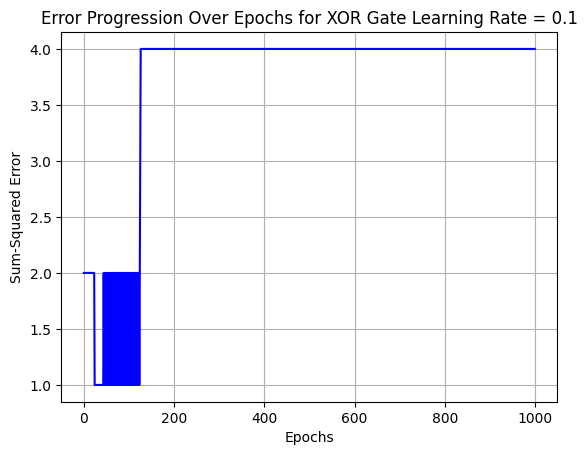

Learning Rate: 0.1
Final Weights: [0.1000000000000188, -0.19999999999999982, -0.14999999999999997]
Total Epochs: 1000


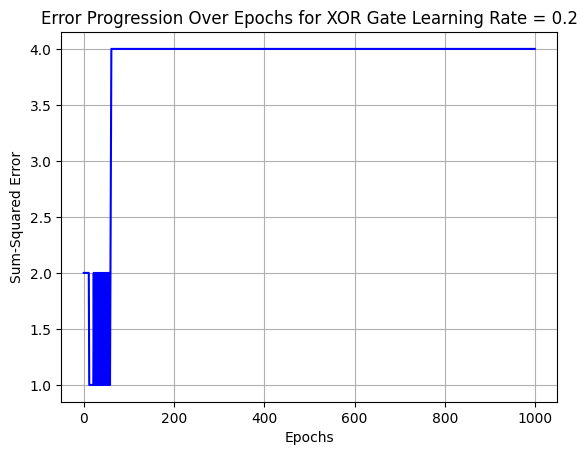

Learning Rate: 0.2
Final Weights: [0.20000000000000207, -0.4000000000000001, -0.35000000000000026]
Total Epochs: 1000


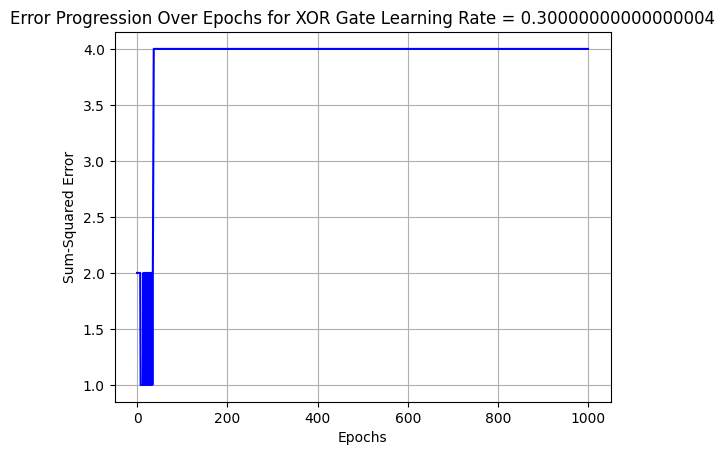

Learning Rate: 0.30000000000000004
Final Weights: [0.6999999999999991, -0.7, -0.7499999999999998]
Total Epochs: 1000


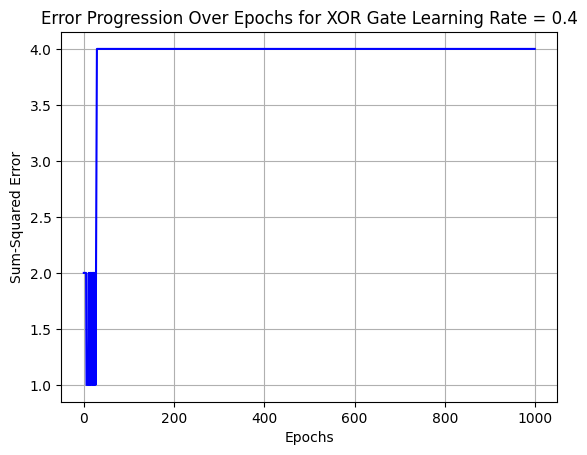

Learning Rate: 0.4
Final Weights: [0.3999999999999957, -0.5999999999999999, -0.7499999999999999]
Total Epochs: 1000


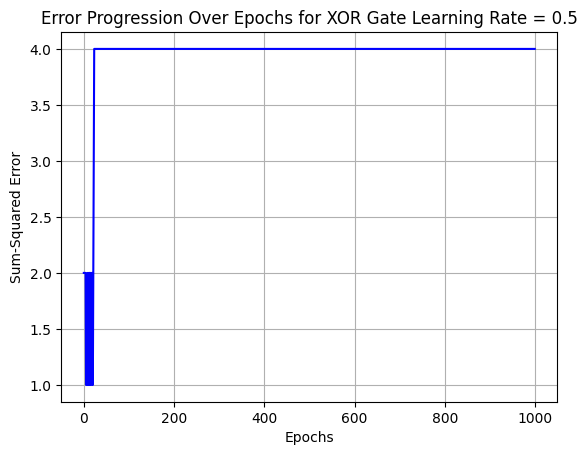

Learning Rate: 0.5
Final Weights: [0.5, -0.7999999999999998, -0.75]
Total Epochs: 1000


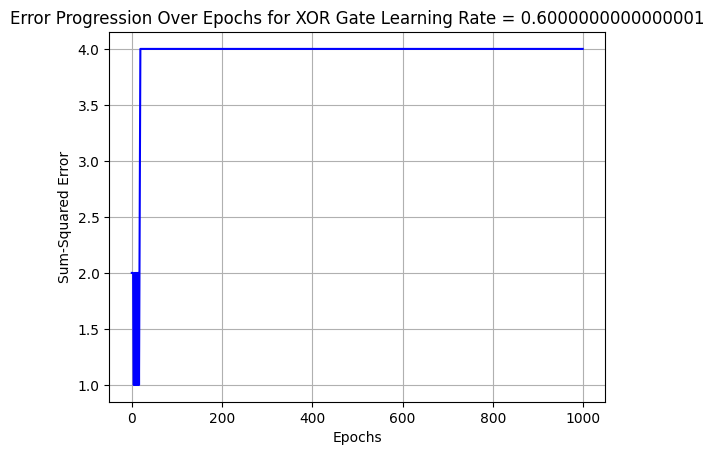

Learning Rate: 0.6000000000000001
Final Weights: [0.400000000000003, -1.0, -0.75]
Total Epochs: 1000


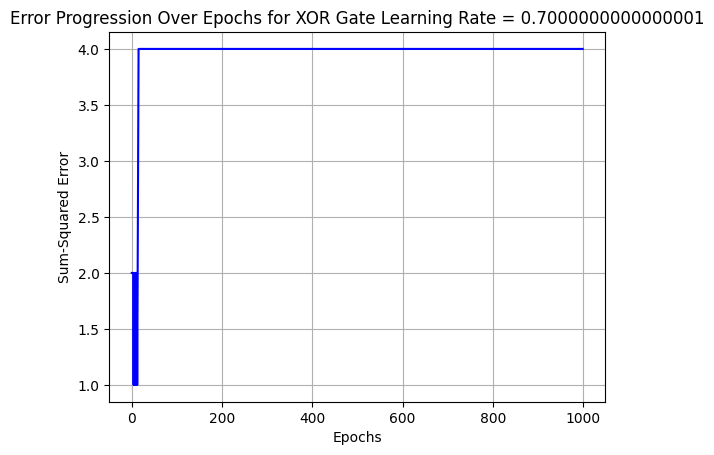

Learning Rate: 0.7000000000000001
Final Weights: [0.8999999999999996, -1.2000000000000002, -1.4500000000000002]
Total Epochs: 1000


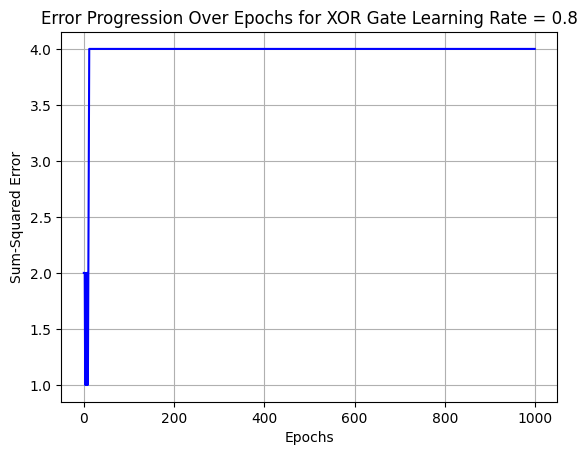

Learning Rate: 0.8
Final Weights: [1.1999999999999997, -1.4000000000000001, -1.5500000000000005]
Total Epochs: 1000


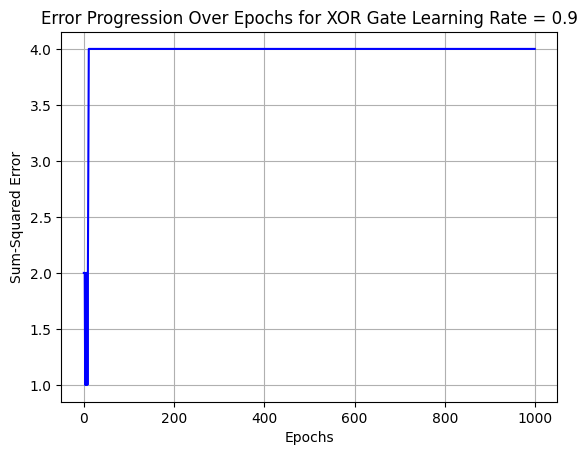

Learning Rate: 0.9
Final Weights: [0.9999999999999981, -1.6, -1.65]
Total Epochs: 1000


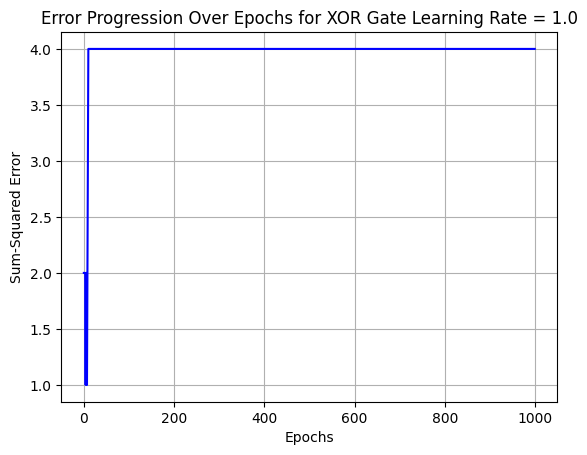

Learning Rate: 1.0
Final Weights: [1.0, -1.7999999999999998, -1.75]
Total Epochs: 1000


In [8]:
# Learning rates to test
learning_rates = [0.1 * i for i in range(1, 11)]

# Store the results for each learning rate
results = {}

for lr in learning_rates:
    final_weights, error_progression, total_epochs = perceptron_xor_gate(xor_gate_inputs, initial_weights, lr)
    results[lr] = {
        "final_weights": final_weights,
        "error_progression": error_progression,
        "total_epochs": total_epochs
    }

# Plotting the results separately for each learning rate
for lr in learning_rates:
    plt.figure()
    plt.plot(range(results[lr]['total_epochs']), results[lr]['error_progression'], linestyle='-', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(f'Error Progression Over Epochs for XOR Gate Learning Rate = {lr}')
    plt.grid(True)
    plt.show()

    print(f"Learning Rate: {lr}")
    print("Final Weights:", results[lr]['final_weights'])
    print("Total Epochs:", results[lr]['total_epochs'])
    

Final Weights: [0.70361792 2.74508947 2.60733926 0.45389309]
Final Bias: -0.26179155793763215
Total Epochs: 999


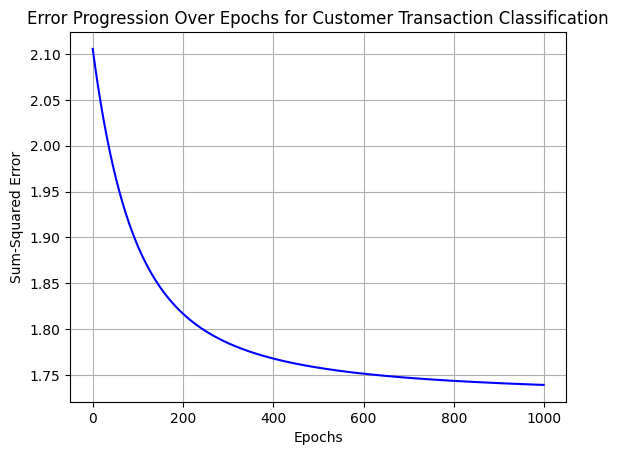

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Function to train the perceptron
def train_perceptron(data, learning_rate=0.1, epochs=1000):
    # Initialize weights and bias
    num_features = len(data[0]) - 1  # Subtract 1 for the label column
    weights = np.random.rand(num_features)
    bias = np.random.rand(1)[0]

    error_progression = []

    for epoch in range(epochs):
        total_error = 0
        for customer in data:
            # Extract features and label
            features = np.array(customer[:-1])
            true_label = customer[-1]
            
            # Calculate weighted sum
            weighted_sum = np.dot(features, weights) + bias
            
            # Apply sigmoid activation function
            prediction = sigmoid(weighted_sum)
            
            # Calculate error
            error = true_label - prediction
            
            # Update weights and bias using gradient descent
            weights += learning_rate * error * sigmoid_derivative(weighted_sum) * features
            bias += learning_rate * error * sigmoid_derivative(weighted_sum)
            
            # Accumulate the squared error for plotting
            total_error += error ** 2
        
        # Append the total error for the current epoch
        error_progression.append(total_error)

        # Stop if error is small enough
        if total_error <= 0.002:
            print(f"Convergence reached at epoch {epoch}")
            break

    return weights, bias, error_progression, epoch

# Customer data
customer_data = [
    [20, 6, 2, 386, 1], [16, 3, 6, 289, 1], [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0], [24, 4, 2, 280, 1], [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1], [18, 4, 2, 274, 1], [21, 1, 4, 148, 0], [16, 2, 4, 198, 0]
]

# Normalize the data
customer_data = np.array(customer_data)
customer_data[:, :-1] = customer_data[:, :-1] / customer_data[:, :-1].max(axis=0)

# Train the perceptron with sigmoid activation
learning_rate = 0.1
weights, bias, error_progression, total_epochs = train_perceptron(customer_data, learning_rate)

# Print results
print("Final Weights:", weights)
print("Final Bias:", bias)
print("Total Epochs:", total_epochs)

# Plotting the error progression
plt.plot(range(total_epochs + 1), error_progression, linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Progression Over Epochs for Customer Transaction Classification')
plt.grid(True)
plt.show()


In [10]:
import numpy as np

# Customer data
customer_data = [
    [20, 6, 2, 386, 1], [16, 3, 6, 289, 1], [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0], [24, 4, 2, 280, 1], [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1], [18, 4, 2, 274, 1], [21, 1, 4, 148, 0], [16, 2, 4, 198, 0]
]

# Normalize the data
customer_data = np.array(customer_data)
X = customer_data[:, :-1]
X = X / X.max(axis=0)
y = customer_data[:, -1]

# Add a bias term to the features
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias unit (column of ones)

# Matrix pseudo-inverse method
pseudo_inverse_weights = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

# Predictions using pseudo-inverse weights
pseudo_predictions = sigmoid(X_b @ pseudo_inverse_weights)

# Rounding to 0 or 1
pseudo_predictions = np.round(pseudo_predictions)

print("Pseudo-Inverse Weights:", pseudo_inverse_weights)
print("Pseudo-Inverse Predictions:", pseudo_predictions)
print("Actual Labels:", y)


Pseudo-Inverse Weights: [ 0.1139903  -0.68376335  0.93806344  0.01866877  0.7458411 ]
Pseudo-Inverse Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]


In [11]:
# A8: Neural Network for AND Gate using Sigmoid Activation Function

import numpy as np


# Function to train a neural network with backpropagation
def train_neural_network(X, y, learning_rate=0.05, epochs=1000):
    input_size = X.shape[1]
    hidden_size = 2
    output_size = 1

    # Initialize weights
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)

    for epoch in range(epochs):
        # Forward pass
        hidden_input = np.dot(X, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, weights_hidden_output)
        final_output = sigmoid(final_input)

        # Calculate the error
        error = y - final_output

        # Backpropagation
        d_output = error * sigmoid_derivative(final_output)
        error_hidden_layer = d_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)

        # Update weights
        weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
        weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

        # Stop if error is small enough
        if np.mean(np.abs(error)) <= 0.002:
            print(f"Convergence reached at epoch {epoch}")
            break

    return weights_input_hidden, weights_hidden_output, epoch

# AND gate data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# Train the neural network
learning_rate = 0.05
weights_input_hidden, weights_hidden_output, total_epochs = train_neural_network(X_and, y_and, learning_rate)

# Print results
print("Final Weights (Input to Hidden):", weights_input_hidden)
print("Final Weights (Hidden to Output):", weights_hidden_output)
print("Total Epochs:", total_epochs)


Final Weights (Input to Hidden): [[-0.13334918 -0.22401687]
 [-0.09395326  0.07956954]]
Final Weights (Hidden to Output): [[-1.18473439]
 [-0.80268032]]
Total Epochs: 999


In [12]:
# XOR gate data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Train the neural network for XOR gate
weights_input_hidden, weights_hidden_output, total_epochs = train_neural_network(X_xor, y_xor, learning_rate)

# Print results
print("Final Weights (Input to Hidden):", weights_input_hidden)
print("Final Weights (Hidden to Output):", weights_hidden_output)
print("Total Epochs:", total_epochs)


Final Weights (Input to Hidden): [[0.5339029  0.25969853]
 [0.23302006 0.27480268]]
Final Weights (Hidden to Output): [[ 0.35744792]
 [-0.36927122]]
Total Epochs: 999


In [13]:
# Multi-output for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_multi = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Multi-output: [O1, O2]

# Train the neural network for multi-output
input_size = X.shape[1]
hidden_size = 2
output_size = 2

weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

for epoch in range(1000):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output)
    final_output = sigmoid(final_input)

    # Calculate the error
    error = y_multi - final_output

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)

    # Update weights
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    # Stop if error is small enough
    if np.mean(np.abs(error)) <= 0.002:
        print(f"Convergence reached at epoch {epoch}")
        break

print("Final Weights (Input to Hidden):", weights_input_hidden)
print("Final Weights (Hidden to Output):", weights_hidden_output)
print("Total Epochs:", epoch)


Final Weights (Input to Hidden): [[-1.54193953 -1.91139803]
 [-1.58862462 -1.79251448]]
Final Weights (Hidden to Output): [[ 1.92562875 -2.02605622]
 [ 2.16554977 -2.22688201]]
Total Epochs: 999


In [14]:
from sklearn.neural_network import MLPClassifier

# AND gate using MLPClassifier
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlp_and.fit(X_and, y_and)
and_predictions = mlp_and.predict(X_and)

print("MLP AND Predictions:", and_predictions)
print("Actual AND:", y_and)

# XOR gate using MLPClassifier
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlp_xor.fit(X_xor, y_xor)
xor_predictions = mlp_xor.predict(X_xor)

print("MLP XOR Predictions:", xor_predictions)
print("Actual XOR:", y_xor)


MLP AND Predictions: [0 0 0 1]
Actual AND: [0 0 0 1]
MLP XOR Predictions: [0 1 1 0]
Actual XOR: [0 1 1 0]


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
from scipy import fft

fake_dir = "E:\\College\\5th Sem\\ML\\Lab\\train\\FAKE"
real_dir = "E:\\College\\5th Sem\\ML\\Lab\\train\\REAL"
    
num_images_to_load = 10000

In [16]:
def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [17]:
def load_img_with_features(filepath, label):
    img = cv2.imread(filepath)
    gray_img = to_gray(img)
    features = np.abs(fft.fft2(gray_img)).flatten()
    return features, label

In [18]:
def load_imgs_from_directory(directory, label, num_images=None):
    images = []
    labels = []
    files = os.listdir(directory)
    if num_images is not None:
        files = files[:num_images]
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(load_img_with_features, os.path.join(directory, filename), label) for filename
                   in files]
        for future in as_completed(futures):
            features, lbl = future.result()
            images.append(features)
            labels.append(lbl)
    return images, labels

In [19]:
fake_images, fake_labels = load_imgs_from_directory(fake_dir, 0, num_images=num_images_to_load)
real_images, real_labels = load_imgs_from_directory(real_dir, 1, num_images=num_images_to_load)

features = np.vstack((fake_images, real_images))
labels = np.concatenate((fake_labels, real_labels))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=32)

In [21]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier


MLP Project Predictions: [0 0 0 ... 0 0 0]
Actual Project Labels: [0 1 0 ... 0 0 1]
Accuracy: 0.5000
Precision: 0.6849
Recall: 0.5000
F1-Score: 0.3348

Classification Report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7983
           1       0.87      0.00      0.00      8017

    accuracy                           0.50     16000
   macro avg       0.68      0.50      0.34     16000
weighted avg       0.68      0.50      0.33     16000



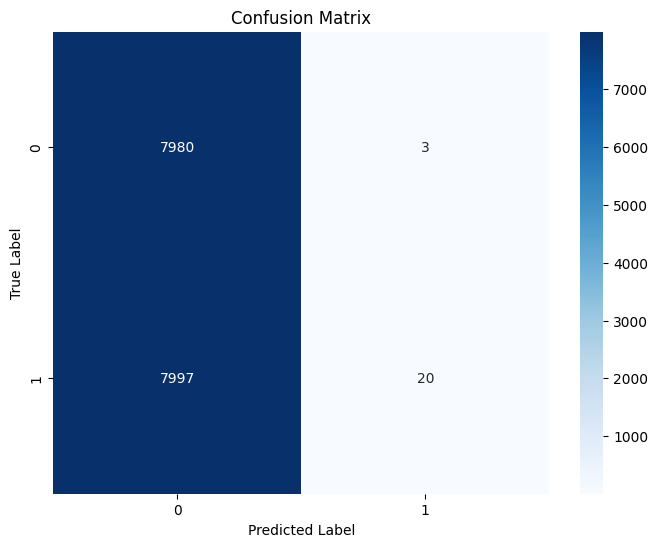

In [22]:
mlp_project = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=1000, learning_rate_init=0.05)
mlp_project.fit(X_train, y_train)
project_predictions = mlp_project.predict(X_train)

print("MLP Project Predictions:", project_predictions)
print("Actual Project Labels:", y_train)

accuracy = accuracy_score(y_train, project_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_train, project_predictions, average='weighted')
recall = recall_score(y_train, project_predictions, average='weighted')
f1 = f1_score(y_train, project_predictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_train, project_predictions))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, project_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

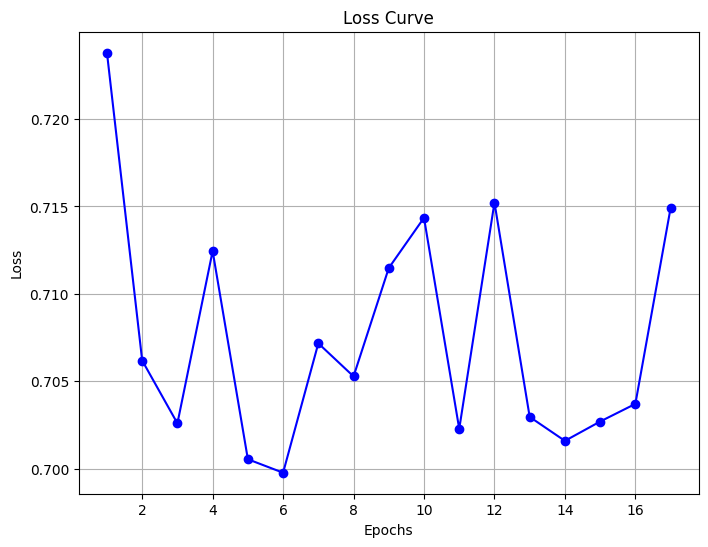

In [23]:
# Access the loss curve from the trained model
loss_values = mlp_project.loss_curve_

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

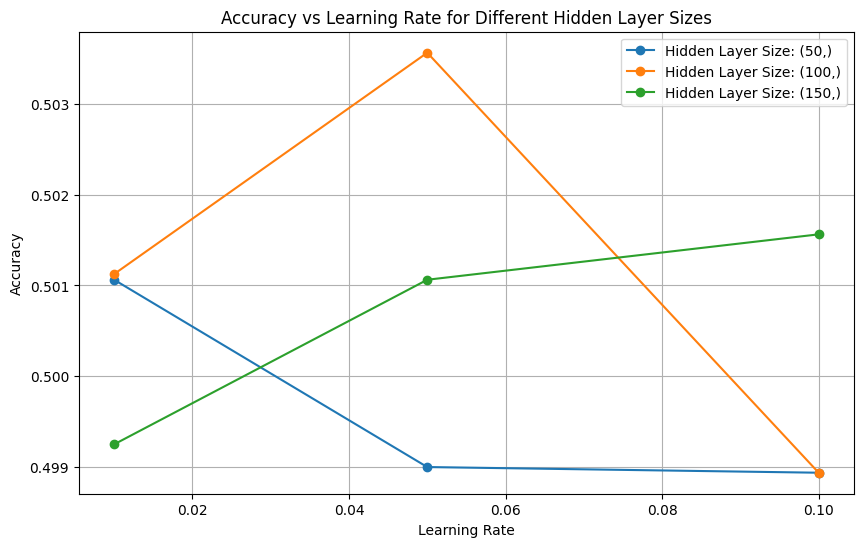

In [24]:
hidden_layer_sizes = [(50,), (100,), (150,)]
learning_rates = [0.01, 0.05, 0.1]

results = []

for size in hidden_layer_sizes:
    for lr in learning_rates:
        mlp = MLPClassifier(hidden_layer_sizes=size, activation='logistic', max_iter=1000, learning_rate_init=lr)
        mlp.fit(X_train, y_train)
        predictions = mlp.predict(X_train)
        
        accuracy = accuracy_score(y_train, predictions)
        precision = precision_score(y_train, predictions, average='weighted')
        recall = recall_score(y_train, predictions, average='weighted')
        f1 = f1_score(y_train, predictions, average='weighted')
        
        results.append({
            'hidden_layer_size': size,
            'learning_rate': lr,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

# Convert results to a structured format and plot
import pandas as pd

results_df = pd.DataFrame(results)

# Plotting accuracy vs different configurations
plt.figure(figsize=(10, 6))
for size in hidden_layer_sizes:
    subset = results_df[results_df['hidden_layer_size'] == size]
    plt.plot(subset['learning_rate'], subset['accuracy'], marker='o', label=f'Hidden Layer Size: {size}')
plt.title('Accuracy vs Learning Rate for Different Hidden Layer Sizes')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
